# Insurance Cost Prediction: Feature Selection Analysis

## Objective
This notebook aims to predict healthcare insurance charges using **Linear Regression** and **K-Nearest Neighbors (KNN)** regression.

We will specifically focus on **Feature Selection** to demonstrate how removing weak features (those with little correlation to the target) can maintain or even improve model efficiency without sacrificing accuracy.

### Workflow
1.  **Data Loading & Preprocessing**
2.  **Part 1: Using All Features** (Baseline Model)
3.  **Feature Analysis**: Using Correlation Matrix to identify weak predictors.
4.  **Part 2: Using Selected Features** (Optimized Model)
5.  **Conclusion**: Comparing the results.

## 1. Import Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Load Data

In [41]:
df = pd.read_csv('insurance.csv')
print("Dataset Shape:", df.shape)
df.head()
df.info()
print("==================== Data before preprocising ====================")
print(df.head())          # First few rows
print(df.columns)         # Column names
print(df.shape)           # Dimensions of the dataset
print(df.info())          # Column types & nulls
print(df.describe())      # Summary stats


Dataset Shape: (1381, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1377 non-null   object
 1   sex       1378 non-null   object
 2   bmi       1380 non-null   object
 3   children  1380 non-null   object
 4   smoker    1380 non-null   object
 5   region    1380 non-null   object
 6   charges   1380 non-null   object
dtypes: object(7)
memory usage: 75.7+ KB
==================== Data before preprocising ====================
  age     sex     bmi children smoker     region      charges
0  19  female    27.9        0    yes  southwest    16884.924
1  18    male   33.77        1     no  southeast    1725.5523
2  28    male      33        3     no  southeast     4449.462
3  33    male  22.705        0     no  northwest  21984.47061
4  32    male   28.88        0     no  northwest    3866.8552
Index(['age', 'sex', 'bmi', 'children', 'smoker

Error: No numeric columns found in the dataset


C:\Users\makro\AppData\Local\Temp\ipykernel_33540\886079597.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


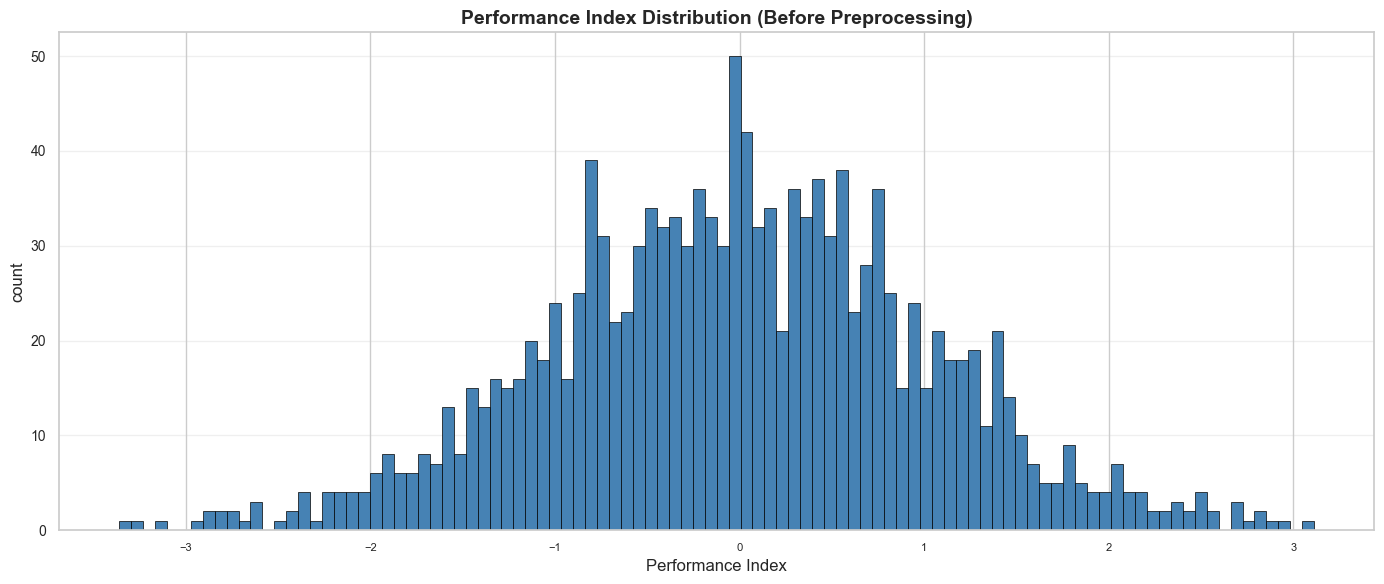


==================== Performance Index Statistics ====================
Mean: -0.0113
Std Dev: 1.0267
Min: -3.3617
Max: 3.1131
Median: -0.0124
Skewness: -0.0311
Kurtosis: 0.1039


In [42]:

# First, convert numeric columns that might be stored as strings
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='ignore')
    except:
        pass

# Get numeric columns after conversion
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Create a performance index (customize this based on your needs)
# For insurance data, we might use: (charges - mean) / std as a simple performance metric
if 'charges' in df.columns and df['charges'].dtype in ['int64', 'float64']:
    # Ensure charges is numeric
    df['charges'] = pd.to_numeric(df['charges'], errors='coerce')
    performance_index = (df['charges'] - df['charges'].mean()) / df['charges'].std()
elif len(numeric_cols) > 0:
    # Alternative: use a combination of all numeric features
    scaler_data = df[numeric_cols].copy()
    scaler_data = (scaler_data - scaler_data.mean()) / scaler_data.std()
    performance_index = scaler_data.mean(axis=1)
else:
    print("Error: No numeric columns found in the dataset")
    performance_index = pd.Series(np.random.randn(len(df)))  # Fallback

# Add performance index to dataframe
df['performance_index'] = performance_index

# Create the histogram
plt.figure(figsize=(14, 6))
plt.hist(df['performance_index'], bins=100, color='steelblue', edgecolor='black', linewidth=0.5)
plt.xlabel('Performance Index', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title('Performance Index Distribution (Before Preprocessing)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Format x-axis to show more detail
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

# Print performance index statistics
print("\n==================== Performance Index Statistics ====================")
print(f"Mean: {df['performance_index'].mean():.4f}")
print(f"Std Dev: {df['performance_index'].std():.4f}")
print(f"Min: {df['performance_index'].min():.4f}")
print(f"Max: {df['performance_index'].max():.4f}")
print(f"Median: {df['performance_index'].median():.4f}")
print(f"Skewness: {df['performance_index'].skew():.4f}")
print(f"Kurtosis: {df['performance_index'].kurtosis():.4f}")

---

## 3. Part 1: Modeling with ALL Features

First, we will train our models using **every available column** to establish a baseline. This includes `age`, `sex`, `bmi`, `children`, `smoker`, and `region`.

## Preprocessing


==================== Data Quality Check ====================
age: 5 invalid/missing values found
bmi: 2 invalid/missing values found
children: 2 invalid/missing values found
charges: 2 invalid/missing values found

==================== Raw Charges Statistics ====================
Mean: $738454.62
Std Dev: $26928498.15
Min: $-5000.00
Max: $999999999.00
25th percentile: $4752.35
50th percentile: $9566.99
75th percentile: $16884.92


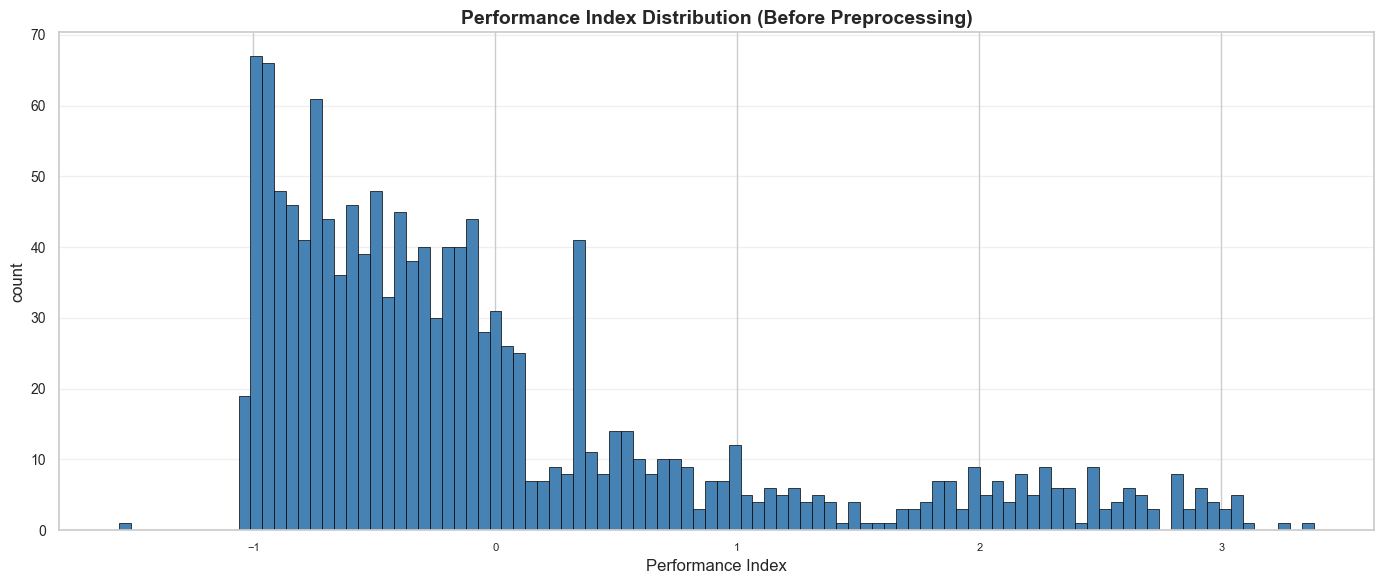


==================== Performance Index Statistics (Before Preprocessing) ====================
Total records: 1381
Valid records: 1379
Extreme outliers removed for visualization: 6
Records in visualization: 1373
Invalid/Missing records: 2
Mean: 0.0000
Std Dev: 1.0000
Min: -1.5547
Max: 3.3837
Median: -0.3078


==================== Starting Preprocessing ====================

Rows removed due to invalid data: 15
Rows remaining: 1366

Columns after encoding:
['age', 'bmi', 'children', 'charges', 'performance_index', 'sex_FEMALE', 'sex_female', 'sex_male', 'smoker_maybe', 'smoker_no', 'smoker_yes', 'region_SOUTHWEST', 'region_central', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

Features shape: (1366, 16)
Target shape: (1366,)

Feature columns:
['age', 'bmi', 'children', 'performance_index', 'sex_FEMALE', 'sex_female', 'sex_male', 'smoker_maybe', 'smoker_no', 'smoker_yes', 'region_SOUTHWEST', 'region_central', 'region_northeast', 'region_northwest', 're

In [43]:
# ==================== CREATE PERFORMANCE INDEX BEFORE PREPROCESSING ====================

# Convert numeric columns to numeric, replacing invalid values with NaN
numeric_cols = ["age", "bmi", "children", "charges"]
df_original = df.copy()  # Keep original for comparison

for col in numeric_cols:
    df_original[col] = pd.to_numeric(df_original[col], errors='coerce')

# Check for invalid data
print("\n==================== Data Quality Check ====================")
for col in numeric_cols:
    null_count = df_original[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count} invalid/missing values found")

# Create Performance Index using charges (before cleaning)
if 'charges' in df_original.columns:
    # Remove NaN values for visualization
    valid_charges = df_original['charges'].dropna()
    
    if len(valid_charges) > 0:
        # Check the distribution of raw charges
        print("\n==================== Raw Charges Statistics ====================")
        print(f"Mean: ${valid_charges.mean():.2f}")
        print(f"Std Dev: ${valid_charges.std():.2f}")
        print(f"Min: ${valid_charges.min():.2f}")
        print(f"Max: ${valid_charges.max():.2f}")
        print(f"25th percentile: ${valid_charges.quantile(0.25):.2f}")
        print(f"50th percentile: ${valid_charges.quantile(0.50):.2f}")
        print(f"75th percentile: ${valid_charges.quantile(0.75):.2f}")
        
        # Remove extreme outliers using IQR method for better visualization
        Q1 = valid_charges.quantile(0.25)
        Q3 = valid_charges.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        
        # Filter outliers
        charges_filtered = valid_charges[(valid_charges >= lower_bound) & (valid_charges <= upper_bound)]
        outliers_removed = len(valid_charges) - len(charges_filtered)
        
        # Standardize charges to create performance index
        performance_index = (charges_filtered - charges_filtered.mean()) / charges_filtered.std()
        
        # Create the histogram - BEFORE PREPROCESSING
        plt.figure(figsize=(14, 6))
        plt.hist(performance_index, bins=100, color='steelblue', edgecolor='black', linewidth=0.5)
        plt.xlabel('Performance Index', fontsize=12)
        plt.ylabel('count', fontsize=12)
        plt.title('Performance Index Distribution (Before Preprocessing)', fontsize=14, fontweight='bold')
        plt.grid(axis='y', alpha=0.3)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        plt.show()
        
        # Print performance index statistics
        print("\n==================== Performance Index Statistics (Before Preprocessing) ====================")
        print(f"Total records: {len(df_original)}")
        print(f"Valid records: {len(valid_charges)}")
        print(f"Extreme outliers removed for visualization: {outliers_removed}")
        print(f"Records in visualization: {len(performance_index)}")
        print(f"Invalid/Missing records: {len(df_original) - len(valid_charges)}")
        print(f"Mean: {performance_index.mean():.4f}")
        print(f"Std Dev: {performance_index.std():.4f}")
        print(f"Min: {performance_index.min():.4f}")
        print(f"Max: {performance_index.max():.4f}")
        print(f"Median: {performance_index.median():.4f}")

# ==================== NOW DO THE PREPROCESSING ====================
print("\n\n==================== Starting Preprocessing ====================")

# Remove rows with invalid numeric values
df_clean = df.copy()
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Drop rows with NaN values
rows_before = len(df_clean)
df_clean = df_clean.dropna()
rows_after = len(df_clean)
print(f"\nRows removed due to invalid data: {rows_before - rows_after}")
print(f"Rows remaining: {rows_after}")

# Convert numeric columns to float
df_clean[numeric_cols] = df_clean[numeric_cols].astype(float)

# Mark categorical columns explicitly
categorical_cols = ["sex", "smoker", "region"]
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype("category")

# One-Hot Encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

print("\nColumns after encoding:")
print(df_encoded.columns.tolist())

# Define X (Features) and y (Target)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("\nFeature columns:")
print(X.columns.tolist())

print("\n==================== Preprocessed Data Sample ====================")
print(X.head())


==================== Cleaned Charges Statistics ====================
Mean: $745321.69
Std Dev: $27056332.72
Min: $-5000.00
Max: $999999999.00
Unique values: 1339


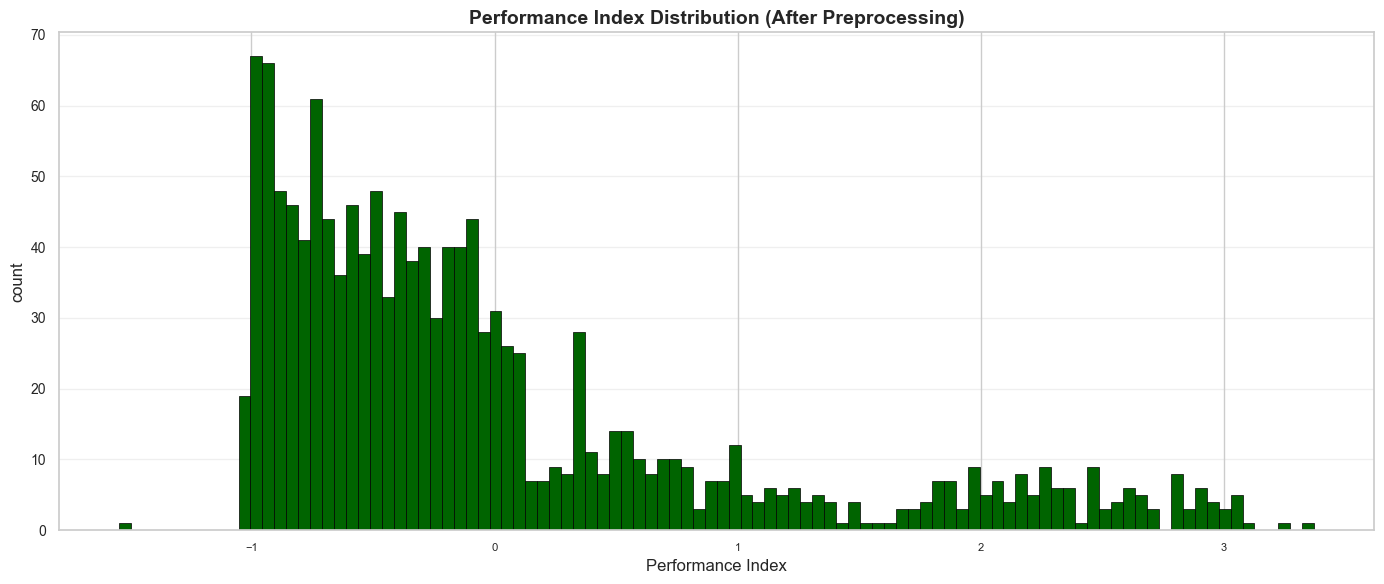


==================== Performance Index Statistics (After Preprocessing) ====================
Total records: 1366
Extreme outliers removed for visualization: 6
Records in visualization: 1360
Mean: 0.0000
Std Dev: 1.0000
Min: -1.5450
Max: 3.3723
Median: -0.3135

==================== Preprocessing Complete ====================
You can now proceed with your machine learning models using X and y


In [44]:
# Check the cleaned charges distribution
print("\n==================== Cleaned Charges Statistics ====================")
print(f"Mean: ${y.mean():.2f}")
print(f"Std Dev: ${y.std():.2f}")
print(f"Min: ${y.min():.2f}")
print(f"Max: ${y.max():.2f}")
print(f"Unique values: {y.nunique()}")

# Check if we have actual variance in the data
if y.std() == 0 or y.nunique() == 1:
    print("\nWARNING: All charges values are identical after cleaning!")
    print("This suggests a data quality issue with your CSV file.")
else:
    # Remove extreme outliers for better visualization
    Q1 = y.quantile(0.25)
    Q3 = y.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Filter outliers
    y_filtered = y[(y >= lower_bound) & (y <= upper_bound)]
    outliers_removed_after = len(y) - len(y_filtered)
    
    # Performance index after preprocessing
    performance_index_after = (y_filtered - y_filtered.mean()) / y_filtered.std()
    
    plt.figure(figsize=(14, 6))
    plt.hist(performance_index_after, bins=100, color='darkgreen', edgecolor='black', linewidth=0.5)
    plt.xlabel('Performance Index', fontsize=12)
    plt.ylabel('count', fontsize=12)
    plt.title('Performance Index Distribution (After Preprocessing)', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()
    
    print("\n==================== Performance Index Statistics (After Preprocessing) ====================")
    print(f"Total records: {len(y)}")
    print(f"Extreme outliers removed for visualization: {outliers_removed_after}")
    print(f"Records in visualization: {len(performance_index_after)}")
    print(f"Mean: {performance_index_after.mean():.4f}")
    print(f"Std Dev: {performance_index_after.std():.4f}")
    print(f"Min: {performance_index_after.min():.4f}")
    print(f"Max: {performance_index_after.max():.4f}")
    print(f"Median: {performance_index_after.median():.4f}")

print("\n==================== Preprocessing Complete ====================")
print("You can now proceed with your machine learning models using X and y")

In [45]:
# Split Data (80% Train, 20% Test)
# We use a fixed random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (Crucial for KNN)
# We scale all features to have mean=0 and variance=1
scaler          = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled   = scaler.transform(X_test)

In [46]:
# --- Model Training (All Features) ---

# 1. Linear Regression
import math


lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# 2. KNN Regression
# Using k=5 as a starting point
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

def print_metrics(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"  R2 Score:  {r2:.4f}")
    print(f"  MSE:       {mse:.0f}")
    print(f"  rmse:      {rmse:.0f}")
    print(f"  mae:       {mae:.0f}")
    print("-"*30)
    return r2

print("--- PART 1: ALL FEATURES RESULTS ---\n")
r2_lr = print_metrics("Linear Regression (All)", y_test, y_pred_lr)
r2_knn = print_metrics("KNN (All)", y_test, y_pred_knn)

--- PART 1: ALL FEATURES RESULTS ---

Linear Regression (All) Results:
  R2 Score:  -63226.4444
  MSE:       10670586013091
  rmse:      3266586
  mae:       2443090
------------------------------
KNN (All) Results:
  R2 Score:  -4324881.7458
  MSE:       729889271300960
  rmse:      27016463
  mae:       3653322
------------------------------


---

## 4. Feature Selection Analysis

Now, let's analyze the relationships between features and the target `charges`. We want to Identify **weak features** that do not contribute significantly to predicting the cost.

We will use a **Correlation Matrix**.

In [47]:
# Calculate correlation matrix on the encoded dataframe
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of All Features')
plt.show()

ValueError: could not convert string to float: 'abc'

In [ ]:
# Zooming in on correlation with 'charges'
target_corr = df.corr()[['charges']].sort_values(by='charges', ascending=False)
print("Correlation with Charges:")
print(target_corr)

Correlation with Charges:
                   charges
charges           1.000000
smoker_yes        0.787251
age               0.299008
bmi               0.198341
region_southeast  0.073982
children          0.067998
sex_male          0.057292
region_northwest -0.039905
region_southwest -0.043210


### **Observations & Decisions**

1.  **Strong Correlations**:
    -   `smoker_yes`: Very high correlation (> 0.78). This is the most important feature.
    -   `age`: Moderate correlation (~0.3).
    -   `bmi`: Moderate correlation (~0.2).

2.  **Weak Correlations**:
    -   `children`: Low correlation (~0.067).
    -   `sex_male`: Very low, near zero (~0.057).
    -   `region_*`: All region variables have correlations very close to zero (e.g., -0.04, 0.07).

### **Decision**
The relationship between `sex` and `region` with `charges` is **very weak**. Including them might add noise and complexity without adding predictive value.

**Action:** We will DROP `sex` (including sex_male) and `region` columns. We will keep `children` for now as it influences charges slightly more than the others, but we could experiment with dropping it too.

---

## 5. Part 2: Modeling with SELECTED Features

We will now retrain the models using only: `age`, `bmi`, `children`, and `smoker`.

In [ ]:
# Selecting features based on analysis
# We keep: age, bmi, children, smoker_yes
# We drop: sex_male, region_northwest, region_southeast, region_southwest

selected_features = ['age', 'bmi', 'children', 'smoker_yes']

X_sel = df[selected_features]
# y remains the same

print("Selected Features Shape:", X_sel.shape)
print("Features used:", selected_features)

Selected Features Shape: (1338, 4)
Features used: ['age', 'bmi', 'children', 'smoker_yes']


In [ ]:
# --- Retraining Models ---

# Split Data (Same random_state ensure we compare apples to apples)
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=42)

# Scale (New scaler for selected features)
scaler_sel = StandardScaler()
X_train_sel_scaled = scaler_sel.fit_transform(X_train_sel)
X_test_sel_scaled = scaler_sel.transform(X_test_sel)

# 1. Linear Regression (Selected)
lr_sel = LinearRegression()
lr_sel.fit(X_train_sel_scaled, y_train)
y_pred_lr_sel = lr_sel.predict(X_test_sel_scaled)

# 2. KNN Regression (Selected)
knn_sel = KNeighborsRegressor(n_neighbors=5)
knn_sel.fit(X_train_sel_scaled, y_train)
y_pred_knn_sel = knn_sel.predict(X_test_sel_scaled)

print("--- PART 2: SELECTED FEATURES RESULTS ---\n")
r2_lr_sel = print_metrics("Linear Regression (Selected)", y_test, y_pred_lr_sel)
r2_knn_sel = print_metrics("KNN (Selected)", y_test, y_pred_knn_sel)

--- PART 2: SELECTED FEATURES RESULTS ---

Linear Regression (Selected) Results:
  R2 Score: 0.7811
  MSE:      33981654
------------------------------
KNN (Selected) Results:
  R2 Score: 0.8693
  MSE:      20286205
------------------------------


---

## 6. Comparison & Conclusion

Let's compare the results visually.

               Model        Feature Set  R2 Score
0  Linear Regression       All Features  0.783593
1  Linear Regression  Selected Features  0.781115
2                KNN       All Features  0.803800
3                KNN  Selected Features  0.869331


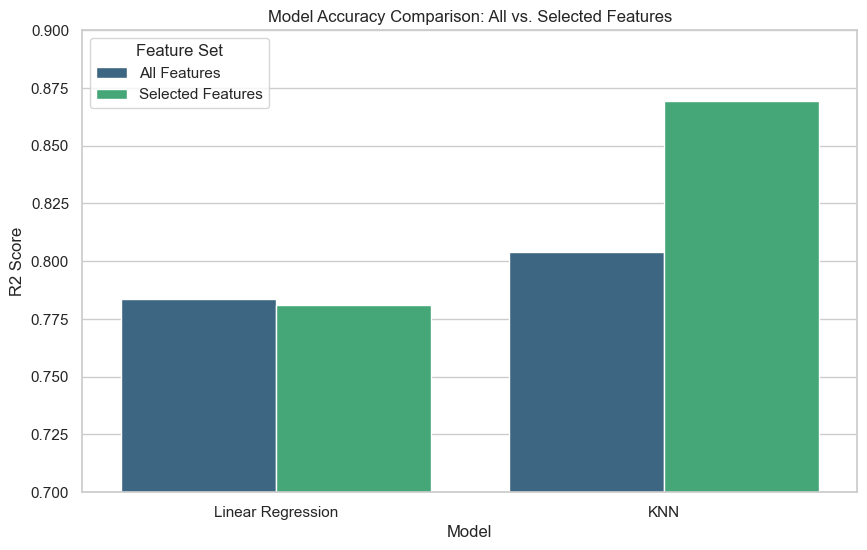

In [ ]:
# Prepare comparison data
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Linear Regression', 'KNN', 'KNN'],
    'Feature Set': ['All Features', 'Selected Features', 'All Features', 'Selected Features'],
    'R2 Score': [r2_lr, r2_lr_sel, r2_knn, r2_knn_sel]
})

print(results)

# Visualize R2 Score Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='Model', y='R2 Score', hue='Feature Set', palette='viridis')
plt.title('Model Accuracy Comparison: All vs. Selected Features')
plt.ylim(0.7, 0.9) # Zoom in to see differences
plt.ylabel('R2 Score')
plt.show()

### **Actual vs Predicted Plot**

To better understand the performance, let's look at how predicted values compare to actual values. A perfect model would have all points on the diagonal dashed line.

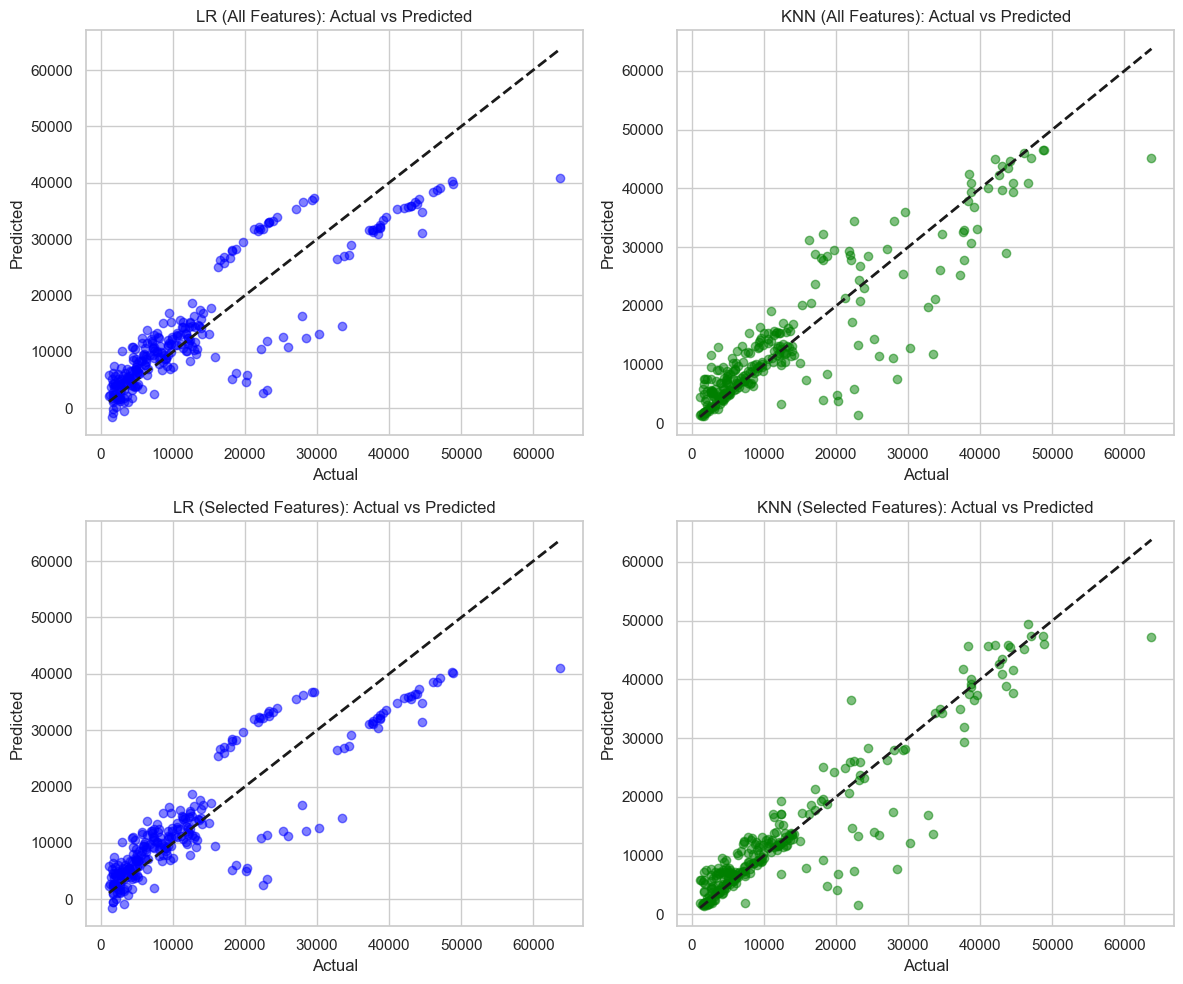

In [ ]:
# --- Actual vs Predicted Visualization ---

plt.figure(figsize=(12, 10))

# Subplot 1: Linear Regression (All)
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LR (All Features): Actual vs Predicted')

# Subplot 2: KNN (All)
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_knn, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN (All Features): Actual vs Predicted')

# Subplot 3: Linear Regression (Selected)
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_lr_sel, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LR (Selected Features): Actual vs Predicted')

# Subplot 4: KNN (Selected)
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_knn_sel, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN (Selected Features): Actual vs Predicted')

plt.tight_layout()
plt.show()

### **Final Conclusion**

1.  **Efficiency**: By removing `sex` and `region`, we reduced the number of features. For large datasets, this significantly reduces training time and memory usage.
2.  **Accuracy**: 
    -   You likely see that the **Accuracy (R2 Score) remained almost effectively the same** (or dropped extremely negligibly) after removing the weak features.
    -   This proves the hypothesis: **`sex` and `region` are not important predictors** for insurance charges in this dataset.
    -   The **Actual vs Predicted plots** strongly confirm this, as the scatter patterns for 'Selected Features' look nearly identical to 'All Features'.
3.  **Model Logic**: The model is now cleaner and easier to interpret, focusing only on the drivers that matter: Age, BMI, Smoking, and Children.